In [1]:
import torch
import torch.nn as nn
import PIL
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms

In [2]:
# Spatial Pyramid Pooling block
# https://arxiv.org/abs/1406.4729
class SPPooling(nn.Module):
    __constants__ = ['output_size', 'pooling_type']
    
    def __init__(self, output_size, pooling_type='max'):
        '''
        output_size: the height and width after spp layer
        pooling_type: the type of pooling 
        '''
        super(SPPooling, self).__init__()
        self.output_size = output_size
        self.pooling_type = pooling_type
        
    def extra_repr(self):
        return 'output_size={output_size}, pooling_type={pooling_type}'.format(**self.__dict__)
        
    def forward(self, x):
        N, C, H, W = x.size()
        ## the size of pooling window
        sizeX  = int(np.ceil(H / self.output_size))
        ## the strides of pooling
        stride = int(np.floor(H / self.output_size))
        if self.pooling_type == 'max':
            self.spp = nn.MaxPool2d(kernel_size=sizeX, stride=stride)
        else:
            self.spp = nn.AdaptiveAvgPool2d(kernel_size=sizeX, stride=stride)
        x = self.spp(x)
        
        return x

In [17]:
normalize10 = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])
normalize100 = transforms.Normalize(mean=[0.5071, 0.4865, 0.4409],
                                    std=[0.2673, 0.2564, 0.2762])

transform = transforms.Compose([
                transforms.Resize((64,64)),
                # transforms.ColorJitter(0.1),
                #transforms.RandomRotation((-180, 180), resample=PIL.Image.BILINEAR),
                # transforms.RandomResizedCrop((32,32)),
                # transforms.RandomHorizontalFlip(),
                # transforms.RandomVerticalFlip(),
                #transforms.RandomCrop(32, 4),
                #transforms.CenterCrop(32),
                transforms.ToTensor(),
                normalize100
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes10 = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

classes100 = (
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

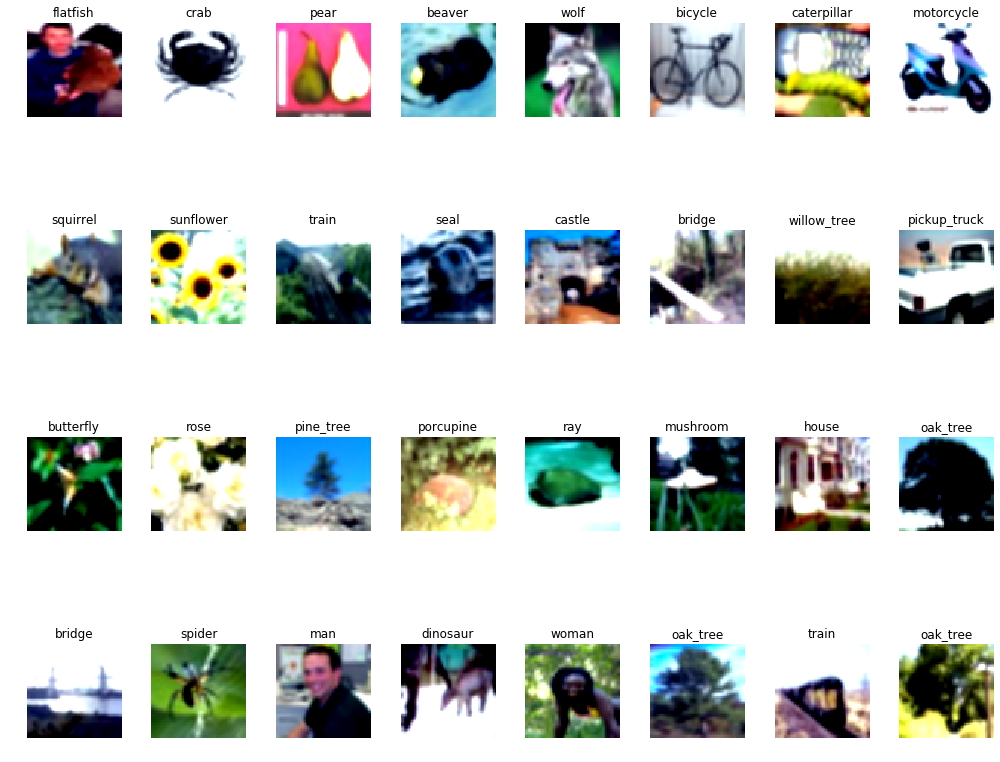

In [19]:
def imshow_v2(tensor, label, nclass):
    plt.figure(figsize=(14,12))
    for i, img in enumerate(tensor):
        plt.subplot(4,8,i+1)
        plt.axis('off')
        # print labels
        plt.title(classes100[labels[i]])
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.tight_layout()
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow_v2(images, labels, len(classes100))

In [5]:
net = torchvision.models.alexnet()
net.avgpool = SPPooling(6)

# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): SPPooling(output_size=6, pooling_type=max)
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Drop

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
import time

st_tik = time.perf_counter()
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        tik = time.perf_counter()
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('epoch #%d, mini-batch #%d , cost: %.3f, loss: %.3f' %
                  (epoch + 1, i + 1, (200 * (time.perf_counter() - tik)), running_loss / 200))
            running_loss = 0.0

print(f'Finished Training in ~{(time.perf_counter() - st_tik)/60}m')

epoch #1, mini-batch #200 , cost: 11.767, loss: 2.747
epoch #2, mini-batch #200 , cost: 11.941, loss: 2.726
epoch #3, mini-batch #200 , cost: 11.974, loss: 2.701
epoch #4, mini-batch #200 , cost: 11.678, loss: 2.665
epoch #5, mini-batch #200 , cost: 11.744, loss: 2.676
epoch #6, mini-batch #200 , cost: 11.789, loss: 2.631
epoch #7, mini-batch #200 , cost: 11.720, loss: 2.634
epoch #8, mini-batch #200 , cost: 11.828, loss: 2.615
epoch #9, mini-batch #200 , cost: 11.742, loss: 2.603
epoch #10, mini-batch #200 , cost: 11.741, loss: 2.568
epoch #11, mini-batch #200 , cost: 11.690, loss: 2.551
epoch #12, mini-batch #200 , cost: 12.096, loss: 2.513
epoch #13, mini-batch #200 , cost: 11.754, loss: 2.513
epoch #14, mini-batch #200 , cost: 11.725, loss: 2.490
epoch #15, mini-batch #200 , cost: 11.871, loss: 2.494
epoch #16, mini-batch #200 , cost: 11.959, loss: 2.455
epoch #17, mini-batch #200 , cost: 11.784, loss: 2.442
epoch #18, mini-batch #200 , cost: 11.692, loss: 2.425
epoch #19, mini-bat